In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# PART A

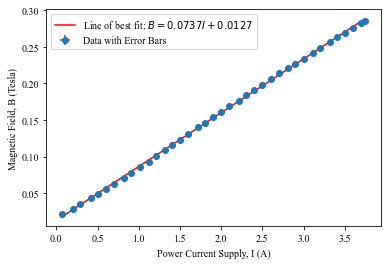

In [21]:
supply_current = np.array([0.07, 0.2, 0.29, 0.42, 0.5, 0.6, 0.7, 0.82, 0.91, 1.01, 1.12, 1.21, 1.32, 1.4, 1.5, 1.6, 1.72, 1.8, 1.9, 2, 2.1, 2.21, 2.3, 2.4, 2.5, 2.6, 2.7, 2.81, 2.9, 3, 3.11, 3.2, 3.32, 3.4, 3.5, 3.6, 3.7, 3.74])  # amperes
mag_F_g = np.array([215, 289, 347, 428, 484, 553, 629, 708, 778, 850, 931, 1006, 1088, 1152, 1232, 1309, 1400, 1461, 1540, 1615, 1689, 1766, 1836, 1913, 1985, 2060, 2140, 2210, 2270, 2340, 2420, 2480, 2570, 2640, 2690, 2760, 2830, 2860])
mag_F_T = mag_F_g / 1e4

m, c = np.polyfit(supply_current, mag_F_T, 1)

mag_F_T_2 = [m * i + c for i in supply_current]
plt.errorbar(supply_current, mag_F_T, xerr= 0.01, yerr=1e-4, fmt='o', label='Data with Error Bars') #errors are the least counts of the devices
plt.plot(supply_current, mag_F_T_2, 'r', label=f'Line of best fit: $B = {m:.4f}I + {c:.4f}$')
plt.xlabel('Power Current Supply, I (A)')
plt.ylabel('Magnetic Field, B (Tesla)')
plt.legend()
plt.savefig("D:/Semester 5/Lab 4/Hall Effect/part_a.pdf", dpi = 300,
            bbox_inches="tight",
            transparent=True)
plt.show()


In [81]:
slope, intercept, r, p, se = linregress(supply_current, mag_F_T)
result = linregress(supply_current, mag_F_T)
print(result.intercept, result.intercept_stderr)

0.0126578616532661 0.000518797365103684


# PART B

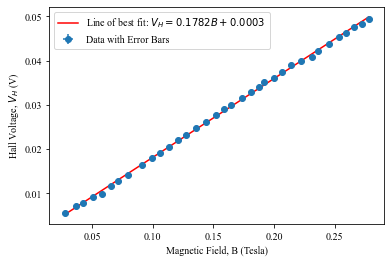

0.17820786992853718


In [83]:
mag_F = np.array([0.02744,0.037021,0.04218,0.051024,0.058394,0.065764,0.07166,0.079767,0.091559,0.099666,0.106299,0.113669,0.121039,0.127672,0.135779,0.143886,0.151993,0.158626,0.164522,0.173366,0.180736,0.187369,0.191791,0.199898,0.206531,0.213901,0.222008,0.230852,0.236011,0.244855,0.253699,0.258858,0.265491,0.272124,0.27802])
H_V = np.array([5.6,7.1,7.85,9.3,9.95,11.7,12.75,14.1,16.35,17.95,19.15,20.5,22.15,23.25,24.75,26.2,27.7,29,29.95,31.65,32.9,33.95,35.1,36,37.35,38.95,39.85,40.85,42.25,43.7,45.4,46.25,47.7,48.35,49.45])/1000

m, c = np.polyfit(mag_F, H_V, 1)

H_V_2 = [m * i + c for i in mag_F]
plt.errorbar(mag_F, H_V, xerr=1e-4, yerr=0.0001, fmt='o', label='Data with Error Bars')  # errors are the least counts of the devices
plt.plot(mag_F, H_V_2, 'r', label=f'Line of best fit: $V_H = {m:.4f}B + {c:.4f}$')
plt.xlabel('Magnetic Field, B (Tesla)')
plt.ylabel('Hall Voltage, $V_H$ (V)')
plt.legend()
plt.savefig("D:/Semester 5/Lab 4/Hall Effect/part_b.pdf", dpi=300,
            bbox_inches="tight",
            transparent=True)
plt.show()
print(m)

In [84]:
slope, intercept, r, p, se = linregress(mag_F, H_V)
result = linregress(mag_F, H_V)
print(result.intercept, result.intercept_stderr)

0.000324761396615289 0.00013405557620725468


In [61]:
I = 5.07/1000
e = 1.602176634e-19
t = 5e-4
rho = 0.1

n= I/(m*e*t)
print('n=',n)
R_H = 1/(n*e)
print('R_H=',R_H)
nu = R_H/rho
print('nu=',nu)

n= 3.5514089271372526e+20
R_H= 0.017574740624116094
nu= 0.17574740624116092


# PART C

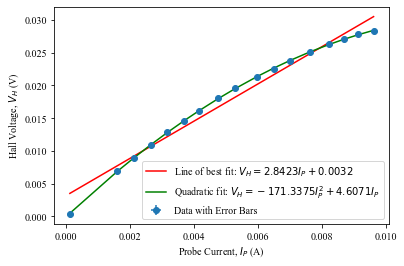

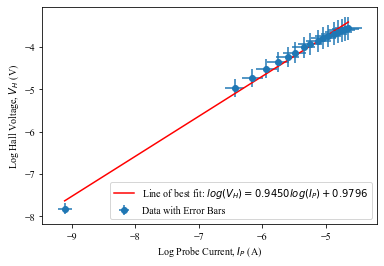

In [92]:
P_current = np.array([0.11,1.6,2.12,2.64,3.16,3.69,4.14,4.74,5.27,5.97,6.49,7,7.62,8.22,8.67,9.13,9.61])/1000
H_V = np.array([0.4,6.95,8.85,10.95,12.9,14.6,16.05,18.1,19.55,21.25,22.55,23.65,25.05,26.25,27.1,27.85,28.35])/1000

m, c = np.polyfit(P_current, H_V, 1)
a,b,k = np.polyfit(P_current, H_V, 2)
H_V_2 = [m * i + c for i in P_current]
H_V_3 = [a*i**2 + b*i + k for i in P_current]
plt.errorbar(P_current, H_V, xerr=0.00001, yerr=0.0001, fmt='o', label='Data with Error Bars')  # errors are the least counts of the devices
plt.plot(P_current, H_V_2, 'r', label=f'Line of best fit: $V_H = {m:.4f}I_P + {c:.4f}$')
plt.plot(P_current, H_V_3, 'g', label=f'Quadratic fit: $V_H = {a:.4f}I_P^2 + {b:.4f}I_P$')
plt.xlabel('Probe Current, $I_{P}$ (A)')
plt.ylabel('Hall Voltage, $V_H$ (V)')
plt.legend()
plt.savefig("D:/Semester 5/Lab 4/Hall Effect/part_c.pdf", dpi=300,
            bbox_inches="tight",
            transparent=True)
plt.show()

log_P_current = np.log(P_current)
log_H_V = np.log(H_V)

m_l, c = np.polyfit(log_P_current, log_H_V, 1)
log_H_V_2 = [m_l * i + c for i in log_P_current]
plt.errorbar(log_P_current, log_H_V, xerr=1/log_P_current, yerr=1/log_H_V, fmt='o', label='Data with Error Bars')  # errors are the least counts of the devices
plt.plot(log_P_current, log_H_V_2, 'r', label=f'Line of best fit: $log(V_H) = {m_l:.4f}log(I_P) + {c:.4f}$')
plt.xlabel('Log Probe Current, $I_{P}$ (A)')
plt.ylabel('Log Hall Voltage, $V_H$ (V)')
plt.legend(loc='lower right')
plt.savefig("D:/Semester 5/Lab 4/Hall Effect/part_c_2.pdf", dpi=300,
            bbox_inches="tight",
            transparent=True)
plt.show()

In [86]:
slope, intercept, r, p, se = linregress(P_current, H_V)
result = linregress(P_current, H_V)
print(result.intercept, result.intercept_stderr)

0.00318113045795799 0.0006951075010078718


In [66]:
B = 0.1
e = 1.602176634e-19
t = 5e-4
rho = 0.1

n= B/(m*e*t)
print('n=',n)
R_H = 1/(n*e)
print('R_H=',R_H)
nu = R_H/rho
print('nu=',nu)

n= 4.391834977027942e+20
R_H= 0.014211620215941124
nu= 0.14211620215941123


# PART D

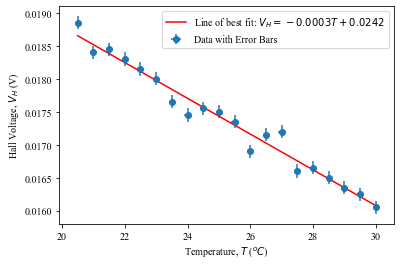

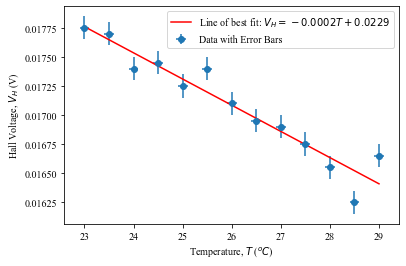

In [43]:
Temp_H = np.array([20.5,21,21.5,22,22.5,23,23.5,24,24.5,25,25.5,26,26.5,27,27.5,28,28.5,29,29.5,30])
H_V = np.array([18.85,18.4,18.45,18.3,18.15,18,17.65,17.45,17.55,17.5,17.35,16.9,17.15,17.2,16.6,16.65,16.5,16.35,16.25,16.05])/1000

m, c = np.polyfit(Temp_H, H_V, 1)
a,b,k = np.polyfit(Temp_H, H_V, 2)
H_V_2 = [m * i + c for i in Temp_H]
plt.errorbar(Temp_H, H_V, xerr=0.1, yerr=0.0001, fmt='o', label='Data with Error Bars')  # errors are the least counts of the devices
plt.plot(Temp_H, H_V_2, 'r', label=f'Line of best fit: $V_H = {m:.4f}T + {c:.4f}$')
plt.xlabel('Temperature, $T$ ($^oC$)')
plt.ylabel('Hall Voltage, $V_H$ (V)')
plt.legend()
plt.savefig("D:/Semester 5/Lab 4/Hall Effect/part_d_h.pdf", dpi=300,
            bbox_inches="tig
            transparent=True)
plt.show()

Temp_C = np.array([29,28.5,28,27.5,27,26.5,26,25.5,25,24.5,24,23.5,23])
H_V_C = np.array([16.65,16.25,16.55,16.75,16.9,16.95,17.1,17.4,17.25,17.45,17.4,17.7,17.75])/1000

m, c = np.polyfit(Temp_C, H_V_C, 1)
H_V_C_2 = [m * i + c for i in Temp_C]
plt.errorbar(Temp_C, H_V_C, xerr=0.1, yerr=0.0001, fmt='o', label='Data with Error Bars')  # errors are the least counts of the devices
plt.plot(Temp_C, H_V_C_2, 'r', label=f'Line of best fit: $V_H = {m:.4f}T + {c:.4f}$')
plt.xlabel('Temperature, $T$ ($^oC$)')
plt.ylabel('Hall Voltage, $V_H$ (V)')
plt.legend()
plt.savefig("D:/Semester 5/Lab 4/Hall Effect/part_d_c.pdf", dpi=300,
            bbox_inches="tight",
            transparent=True)
plt.show()

# Extras

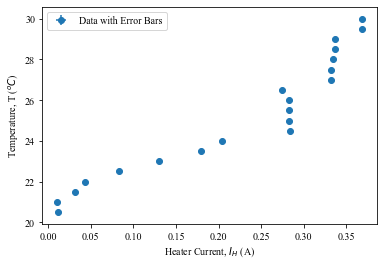

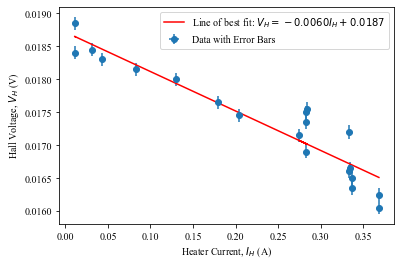

In [51]:
H_current = np.array([11.6,10.8,31.4,42.7,82.8,130.3,179.2,203.7,284.2,282.4,283.2,282.7,274.5,332.6,332.7,334.2,336.3,336.3,368.3,368.3])/1000

m, c = np.polyfit(H_current, Temp_H, 1)
a,b,k = np.polyfit(H_current, Temp_H, 2)
Temp_H_2 = [m * i + c for i in H_current]
Temp_H_3 = [a*i**2 + b*i + k for i in H_current]
plt.errorbar(H_current, Temp_H, xerr=0.00001, yerr=0.1, fmt='o', label='Data with Error Bars')  # errors are the least counts of the devices
#plt.plot(H_current,Temp_H_2, 'r', label=f'Line of best fit: $T = {m:.4f}I_H + {c:.4f}$')
#plt.plot(H_current, Temp_H_3, 'g', label=f'Quadratic fit: $T = {a:.4f}I_H^2 + {b:.4f}I_H + {k:.4f}$')
plt.xlabel('Heater Current, $I_{H}$ (A)')
plt.ylabel('Temperature, T ($^oC$)')
plt.legend()
plt.savefig("D:/Semester 5/Lab 4/Hall Effect/extra_a.pdf", dpi=300,
            bbox_inches="tight",
            transparent=True)
plt.show()

m, c = np.polyfit(H_current, H_V, 1)
a,b,k = np.polyfit(H_current, H_V, 2)
H_V_2 = [m * i + c for i in H_current]
H_V_3 = [a*i**2 + b*i + k for i in H_current]
plt.errorbar(H_current, H_V, xerr=0.00001, yerr=0.0001, fmt='o', label='Data with Error Bars')  # errors are the least counts of the devices
plt.plot(H_current, H_V_2, 'r', label=f'Line of best fit: $V_H = {m:.4f}I_H + {c:.4f}$')
#plt.plot(H_current, H_V_3, 'g', label=f'Quadratic fit: $V_H = {a:.4f}I_H^2 + {b:.4f}I_H + {k:.4f}$')
plt.xlabel('Heater Current, $I_{H}$ (A)')
plt.ylabel('Hall Voltage, $V_H$ (V)')
plt.legend()
plt.savefig("D:/Semester 5/Lab 4/Hall Effect/extra_b.pdf", dpi=300,
            bbox_inches="tight",
            transparent=True)
plt.show()

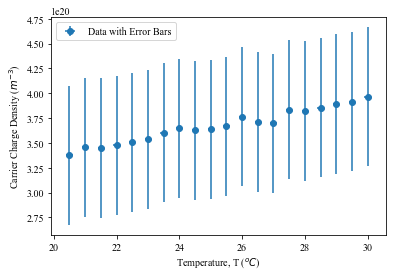

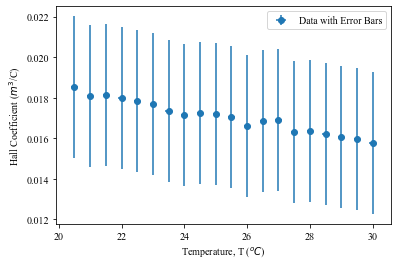

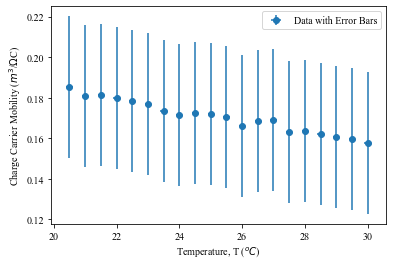

In [89]:
# For Temperature:
# Add errorbars and add these plots
n_H = np.array([3.37533E+20,3.45788E+20,3.44851E+20,3.47678E+20,3.50551E+20,3.53472E+20,3.60482E+20,3.64613E+20,3.62536E+20,3.63571E+20,3.66715E+20,3.76479E+20,3.70991E+20,3.69913E+20,3.83283E+20,3.82132E+20,3.85606E+20,3.89144E+20,3.91538E+20,3.96417E+20])
R_H_H = np.array([0.01851669941,0.01807465619,0.0181237721,0.01797642436,0.01782907662,0.01768172888,0.01733791749,0.01714145383,0.01723968566,0.01719056974,0.017043222,0.01660117878,0.01684675835,0.01689587426,0.0163064833,0.01635559921,0.01620825147,0.01606090373,0.01596267191,0.01576620825])
nu_H = np.array([0.1851669941,0.1807465619,0.181237721,0.1797642436,0.1782907662,0.1768172888,0.1733791749,0.1714145383,0.1723968566,0.1719056974,0.17043222,0.1660117878,0.1684675835,0.1689587426,0.163064833,0.1635559921,0.1620825147,0.1606090373,0.1596267191,0.1576620825])

n_C = np.array([3.82132E+20,3.91538E+20,3.84441E+20,3.79851E+20,3.76479E+20,3.75369E+20,3.72076E+20,3.65661E+20,3.68841E+20,3.64613E+20,3.65661E+20,3.59463E+20,3.58451E+20])
R_H_C = np.array([0.01635559921,0.01596267191,0.01625736739,0.01645383104,0.01660117878,0.0166502947,0.01679764244,0.01709233792,0.01694499018,0.01714145383,0.01709233792,0.0173870334,0.01743614931])
nu_C = np.array([0.1635559921,0.1596267191,0.1625736739,0.1645383104,0.1660117878,0.166502947,0.1679764244,0.1709233792,0.1694499018,0.1714145383,0.1709233792,0.173870334,0.1743614931])


plt.errorbar(Temp_H, n_H, xerr=0.1, yerr=7e19, fmt='o', label='Data with Error Bars')
plt.xlabel('Temperature, T ($^oC$)')
plt.ylabel('Carrier Charge Density ($m^{-3}$)')
plt.legend(loc='upper left')
plt.savefig("D:/Semester 5/Lab 4/Hall Effect/extra_c.pdf", dpi=300,
            bbox_inches="tight",
            transparent=True)
plt.show()


plt.errorbar(Temp_H, R_H_H, xerr=0.1, yerr=0.0035, fmt='o', label='Data with Error Bars')
plt.xlabel('Temperature, T ($^oC$)')
plt.ylabel('Hall Coefficient ($m^{3}$/C)')
plt.legend()
plt.savefig("D:/Semester 5/Lab 4/Hall Effect/extra_d.pdf", dpi=300,
            bbox_inches="tight",
            transparent=True)
plt.show()

plt.errorbar(Temp_H, nu_H, xerr=0.1, yerr=0.0350, fmt='o', label='Data with Error Bars')
plt.xlabel('Temperature, T ($^oC$)')
plt.ylabel('Charge Carrier Mobility ($m^{3}$/$\Omega$C)')
plt.legend()
plt.savefig("D:/Semester 5/Lab 4/Hall Effect/extra_e.pdf", dpi=300,
            bbox_inches="tight",
            transparent=True)
plt.show()


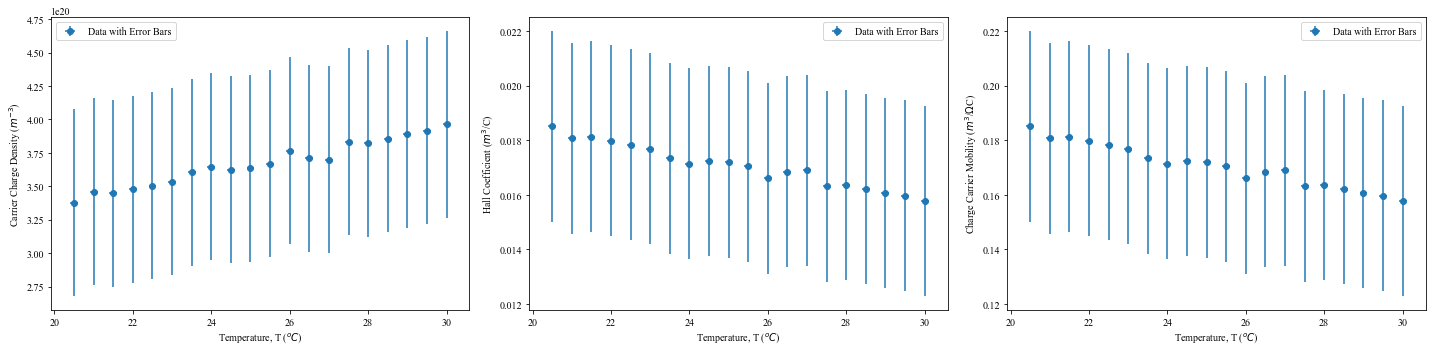

In [91]:
# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot the first graph
axs[0].errorbar(Temp_H, n_H, xerr=0.1, yerr=7e19, fmt='o', label='Data with Error Bars')
axs[0].set_xlabel('Temperature, T ($^oC$)')
axs[0].set_ylabel('Carrier Charge Density ($m^{-3}$)')
axs[0].legend(loc='upper left')

# Plot the second graph
axs[1].errorbar(Temp_H, R_H_H, xerr=0.1, yerr=0.0035, fmt='o', label='Data with Error Bars')
axs[1].set_xlabel('Temperature, T ($^oC$)')
axs[1].set_ylabel('Hall Coefficient ($m^{3}$/C)')
axs[1].legend()

# Plot the third graph
axs[2].errorbar(Temp_H, nu_H, xerr=0.1, yerr=0.0350, fmt='o', label='Data with Error Bars')
axs[2].set_xlabel('Temperature, T ($^oC$)')
axs[2].set_ylabel('Charge Carrier Mobility ($m^{3}$/$\Omega$C)')
axs[2].legend()

# Adjust the layout
plt.tight_layout()

# Save or display the subplots
plt.savefig("D:/Semester 5/Lab 4/Hall Effect/combined_plots.pdf", dpi=300,
            bbox_inches="tight", transparent=True)
plt.show()
